In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../dataset/wk6/ex1.csv", index_col="Person")
df

,Age,Income,Yrs worked,Vacation
Person,,,,
1,30,200,10,4
2,40,300,20,4
3,50,800,20,1
4,60,600,20,2
5,40,300,20,5


[[ 1.04e+02  1.84e+03  2.80e+01 -1.08e+01]
 [ 1.84e+03  5.04e+04  4.80e+02 -3.08e+02]
 [ 2.80e+01  4.80e+02  1.60e+01 -1.60e+00]
 [-1.08e+01 -3.08e+02 -1.60e+00  2.16e+00]]


<AxesSubplot:>

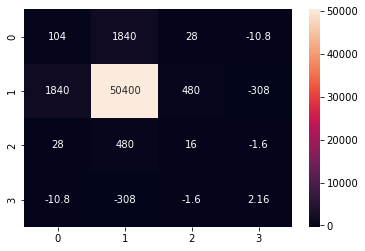

In [48]:
M = df.values
n = M.shape[0]
one = np.ones([n, 1])
d = np.matmul(one, one.T)
d = np.matmul(d, M) / n
d = M - d

V = np.matmul(d.T, d) / n

print(V)

sns.heatmap(V, annot=True, fmt='g')

[[ 1.30e+02  2.30e+03  3.50e+01 -1.35e+01]
 [ 2.30e+03  6.30e+04  6.00e+02 -3.85e+02]
 [ 3.50e+01  6.00e+02  2.00e+01 -2.00e+00]
 [-1.35e+01 -3.85e+02 -2.00e+00  2.70e+00]]


<AxesSubplot:>

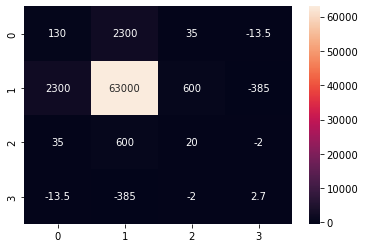

In [49]:
M = df.values.T

covMatrix = np.cov(M, bias=False)
print(covMatrix)

sns.heatmap(covMatrix, annot=True, fmt='g')

[[ 12.64   7.68  -9.6 ]
 [  7.68  17.36 -13.8 ]
 [ -9.6  -13.8   14.8 ]]


<AxesSubplot:>

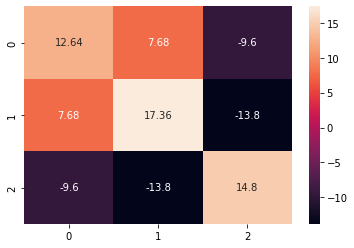

In [54]:
# calculate population covariance matrix

A = [45, 37, 42, 35, 39]
B = [38, 31, 26, 28, 33]
C = [10, 15, 17, 21, 12]

data = np.array([A, B, C])
covMatrix = np.cov(data, bias=True) # set bias True for population
print(covMatrix)

sns.heatmap(covMatrix, annot=True, fmt='g')

[[ 15.8    9.6  -12.  ]
 [  9.6   21.7  -17.25]
 [-12.   -17.25  18.5 ]]


<AxesSubplot:>

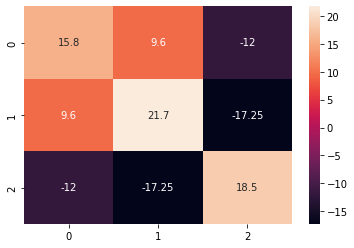

In [55]:
#caculate sample covariance matrix

A = [45, 37, 42, 35, 39]
B = [38, 31, 26, 28, 33]
C = [10, 15, 17, 21, 12]

data = np.array([A, B, C])
covMatrix = np.cov(data, bias=False) #set bias false for calculate sample
print(covMatrix)

sns.heatmap(covMatrix, annot=True, fmt='g')

In [23]:
#load dataset
df = pd.read_csv("../dataset/wk6/chimp.csv", )
df

,Number of Chimpanzees,Percent Successful Hunts
0,1,30
1,2,45
2,3,51
3,4,57
4,5,60
5,6,65
6,7,70
7,8,71


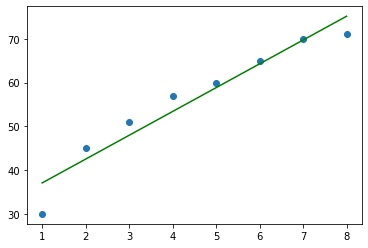

In [24]:
#precalculate
df_data = df.values
sum_x = np.sum(df_data[:, 0])
sum_y = np.sum(df_data[:, 1])
sum_xy = np.sum(np.multiply(df_data[:, 0], df_data[:, 1]))
sum_x_pow = np.sum(np.power(df_data[:, 0], 2))
sum_y_pow = np.sum(np.power(df_data[:, 1], 2))
n = df_data.shape[0]

#calculate with precalculation for simplicity

m = (n * (sum_xy) - (sum_x) * (sum_y)) / (n * (sum_x_pow) - (sum_x) ** 2)
b = (sum_y - m * (sum_x)) / n

# create domain for X
x = np.linspace(1, 8, 200)
#predict y

y = m * x + b
plt.plot(x, y, '-g')
plt.scatter(df_data[:, 0], df_data[:, 1])

In [37]:
df = pd.read_csv("../dataset/wk6/salary.csv")
df

,spends,income
0,2400,41200
1,2650,50100
2,2350,52000
3,4950,66000
4,3100,44500
5,2500,37700
6,5106,73500
7,3100,37500
8,2900,56700
9,1750,35600


In [41]:
#precalculation

df_data = df.values
sum_x = np.sum(df_data[:, 0])
sum_y = np.sum(df_data[:, 1])
sum_xy = np.sum(np.multiply(df_data[:, 0], df_data[:, 1]))
sum_x_pow = np.sum(np.power(df_data[:, 0], 2))
sum_y_pow = np.sum(np.power(df_data[:, 1], 2))
n = df_data.shape[0]

#calculate slope and intercept with precalculation

m = (n * (sum_xy) - (sum_x) * (sum_y)) / (n * (sum_x_pow) - (sum_x) ** 2)
b = (sum_y - m * (sum_x)) / n

#create domain X
x = np.linspace(1500, 5500, 200)

#predict y
y = m * x + b

print(f'Prediction the income of person who spend 3500 => {m * 3500 + b}')
print(f'Prediction the income of person who spend 5300 => {m * 5300 + b}')
plt.plot(x, y, '-g')
plt.scatter(df_data[:, 0], df_data[:, 1])
plt.scatter(3500, m * 3500 + b, color='red')
plt.scatter(5300, m * 5300 + b, color='red') # prediction

[ 5760000  7022500  5522500 24502500  9610000  6250000 26071236  9610000
  8410000  3062500]
[1697440000 2510010000 2704000000 4356000000 1980250000 1421290000
 5402250000 1406250000 3214890000 1267360000]
Prediction the income of person who spend 3500 => 53579.23010052387
Prediction the income of person who spend 5300 => 71172.49233453188


KeyboardInterrupt: 

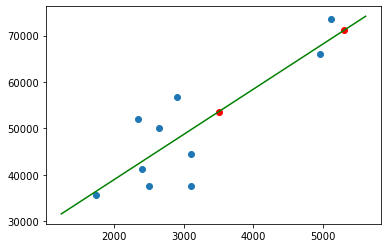

In [42]:
from sklearn.linear_model import LinearRegression

X = df_data[:, 0]
y = df_data[:, 1]
model = LinearRegression() #Use Linear regression model
model.fit(X[:, np.newaxis], y) # fit data with X

#setting domain for X
x = np.linspace(X.min() - 500, X.max() + 500, 100)
#Predict y
y = model.predict(x.reshape(-1, 1))

plt.plot(x, y, '-g')
plt.scatter(df_data[:, 0], df_data[:, 1])

#predict y with linear regression model
plt.scatter(3500, model.predict([[3500]]), color='red')
plt.scatter(5300, model.predict([[5300]]), color='red')
